## Multivariate Analysis
#### Examining the relationships between three or more variables


In [26]:
# importing libraries

import pandas as pd #used for data pre-processing 
import matplotlib.pyplot as plt #used for data visualization 
import seaborn as sns #used for data visualization 
import missingno as msno #used for missing data visualization 
from collections import Counter #used for counting

In [27]:
#Reading/loading the data
df = pd.read_csv("Dune Sales Data.csv")
df.head()

,Date,Customer,Sales Person,Customer_Age,Customer_Gender,State,Product_Category,Sub_Category,Payment Option,Quantity,Unit_Cost,Unit_Price
0,19-Feb-16,High,Segun,29,F,Abia,Accessories,Keyboard,Online,1.0,80.00,109.00
1,20-Feb-16,High,Segun,29,F,Abia,Clothing,Polo shirts,Online,2.0,24.50,28.50
2,27-Feb-16,High,Segun,29,F,Abia,Accessories,Keyboard,Online,3.0,3.67,5.00
3,12-Mar-16,High,Segun,29,F,Abia,Accessories,Keyboard,Online,2.0,87.50,116.50
4,12-Mar-16,High,Segun,29,F,Abia,Accessories,Keyboard,Online,3.0,35.00,41.67


In [28]:
df.columns

Index(['Date', 'Customer', 'Sales Person', 'Customer_Age', 'Customer_Gender',
       'State', 'Product_Category', 'Sub_Category', 'Payment Option',
       'Quantity', 'Unit_Cost', 'Unit_Price'],
      dtype='object')

In [29]:
#Drop/remove the missing data
df.dropna(inplace=True)
df.isnull().sum()

Date                0
Customer            0
Sales Person        0
Customer_Age        0
Customer_Gender     0
State               0
Product_Category    0
Sub_Category        0
Payment Option      0
Quantity            0
Unit_Cost           0
Unit_Price          0
dtype: int64

In [30]:
#Convert the date feature from object to pandas datetime datatype
df["Date"] = pd.to_datetime(df["Date"])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34866 entries, 0 to 34865
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              34866 non-null  datetime64[ns]
 1   Customer          34866 non-null  object        
 2   Sales Person      34866 non-null  object        
 3   Customer_Age      34866 non-null  int64         
 4   Customer_Gender   34866 non-null  object        
 5   State             34866 non-null  object        
 6   Product_Category  34866 non-null  object        
 7   Sub_Category      34866 non-null  object        
 8   Payment Option    34866 non-null  object        
 9   Quantity          34866 non-null  float64       
 10  Unit_Cost         34866 non-null  float64       
 11  Unit_Price        34866 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(7)
memory usage: 3.5+ MB


C:\Users\Godgive Computer\AppData\Local\Temp\ipykernel_13428\219074540.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["Date"] = pd.to_datetime(df["Date"])


In [31]:
#Extract Year, Month, Quarter from Date

df["Year"] = df["Date"].dt.year
df["Month"] = df["Date"].dt.month
df["Month_name"] = df["Date"].dt.month_name()
df["Quarter"] = df["Date"].dt.quarter
df["Day"] = df["Date"].dt.day_name()
df.head()

,Date,Customer,Sales Person,Customer_Age,Customer_Gender,State,Product_Category,Sub_Category,Payment Option,Quantity,Unit_Cost,Unit_Price,Year,Month,Month_name,Quarter,Day
0,2016-02-19,High,Segun,29,F,Abia,Accessories,Keyboard,Online,1.0,80.00,109.00,2016,2,February,1,Friday
1,2016-02-20,High,Segun,29,F,Abia,Clothing,Polo shirts,Online,2.0,24.50,28.50,2016,2,February,1,Saturday
2,2016-02-27,High,Segun,29,F,Abia,Accessories,Keyboard,Online,3.0,3.67,5.00,2016,2,February,1,Saturday
3,2016-03-12,High,Segun,29,F,Abia,Accessories,Keyboard,Online,2.0,87.50,116.50,2016,3,March,1,Saturday
4,2016-03-12,High,Segun,29,F,Abia,Accessories,Keyboard,Online,3.0,35.00,41.67,2016,3,March,1,Saturday


In [32]:
#group customer age
# create an age function

def age_group(x):
    if x <=25:
        return "0-25 Young Adults"
    elif x <=40:
        return "26-40 Adults"
    elif x <=50:
        return "41-50 Older Adults"
    else:
        return "Above 50 Elders"
    
#Apply function to data
df["age_group"] = df["Customer_Age"].apply(age_group)
df.head() 

,Date,Customer,Sales Person,Customer_Age,Customer_Gender,State,Product_Category,Sub_Category,Payment Option,Quantity,Unit_Cost,Unit_Price,Year,Month,Month_name,Quarter,Day,age_group
0,2016-02-19,High,Segun,29,F,Abia,Accessories,Keyboard,Online,1.0,80.00,109.00,2016,2,February,1,Friday,26-40 Adults
1,2016-02-20,High,Segun,29,F,Abia,Clothing,Polo shirts,Online,2.0,24.50,28.50,2016,2,February,1,Saturday,26-40 Adults
2,2016-02-27,High,Segun,29,F,Abia,Accessories,Keyboard,Online,3.0,3.67,5.00,2016,2,February,1,Saturday,26-40 Adults
3,2016-03-12,High,Segun,29,F,Abia,Accessories,Keyboard,Online,2.0,87.50,116.50,2016,3,March,1,Saturday,26-40 Adults
4,2016-03-12,High,Segun,29,F,Abia,Accessories,Keyboard,Online,3.0,35.00,41.67,2016,3,March,1,Saturday,26-40 Adults


In [33]:
# Cost, Revenue and Profit calculation

df["Cost"] = df["Unit_Cost"] * df["Quantity"]
df["Revenue"] = df["Unit_Price"] * df["Quantity"]
df["Profit"] = df["Revenue"] - df["Cost"]
df.head()

,Date,Customer,Sales Person,Customer_Age,Customer_Gender,State,Product_Category,Sub_Category,Payment Option,Quantity,...,Unit_Price,Year,Month,Month_name,Quarter,Day,age_group,Cost,Revenue,Profit
0,2016-02-19,High,Segun,29,F,Abia,Accessories,Keyboard,Online,1.0,...,109.00,2016,2,February,1,Friday,26-40 Adults,80.00,109.00,29.00
1,2016-02-20,High,Segun,29,F,Abia,Clothing,Polo shirts,Online,2.0,...,28.50,2016,2,February,1,Saturday,26-40 Adults,49.00,57.00,8.00
2,2016-02-27,High,Segun,29,F,Abia,Accessories,Keyboard,Online,3.0,...,5.00,2016,2,February,1,Saturday,26-40 Adults,11.01,15.00,3.99
3,2016-03-12,High,Segun,29,F,Abia,Accessories,Keyboard,Online,2.0,...,116.50,2016,3,March,1,Saturday,26-40 Adults,175.00,233.00,58.00
4,2016-03-12,High,Segun,29,F,Abia,Accessories,Keyboard,Online,3.0,...,41.67,2016,3,March,1,Saturday,26-40 Adults,105.00,125.01,20.01


In [34]:
# Profilt / Loss grouping

def prolos(P):
    if P >0:
        return "Profit"
    else:
        return "Loss"
    
df["Profit_Label"] = df["Profit"].apply(prolos)
df.head() 

,Date,Customer,Sales Person,Customer_Age,Customer_Gender,State,Product_Category,Sub_Category,Payment Option,Quantity,...,Year,Month,Month_name,Quarter,Day,age_group,Cost,Revenue,Profit,Profit_Label
0,2016-02-19,High,Segun,29,F,Abia,Accessories,Keyboard,Online,1.0,...,2016,2,February,1,Friday,26-40 Adults,80.00,109.00,29.00,Profit
1,2016-02-20,High,Segun,29,F,Abia,Clothing,Polo shirts,Online,2.0,...,2016,2,February,1,Saturday,26-40 Adults,49.00,57.00,8.00,Profit
2,2016-02-27,High,Segun,29,F,Abia,Accessories,Keyboard,Online,3.0,...,2016,2,February,1,Saturday,26-40 Adults,11.01,15.00,3.99,Profit
3,2016-03-12,High,Segun,29,F,Abia,Accessories,Keyboard,Online,2.0,...,2016,3,March,1,Saturday,26-40 Adults,175.00,233.00,58.00,Profit
4,2016-03-12,High,Segun,29,F,Abia,Accessories,Keyboard,Online,3.0,...,2016,3,March,1,Saturday,26-40 Adults,105.00,125.01,20.01,Profit


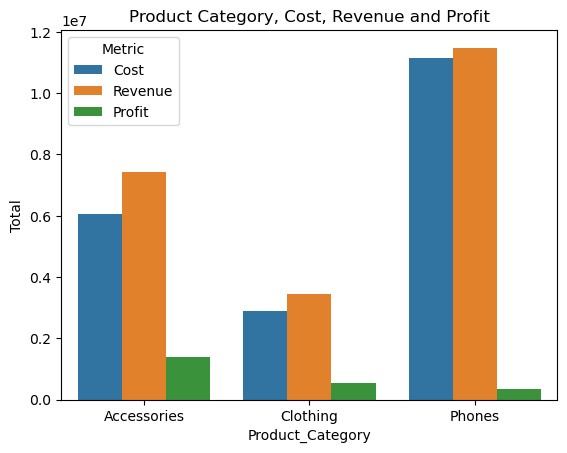

In [36]:
# Reveiwing Product category against cost, revenue and profit
Prod_cat = df.groupby("Product_Category")[["Cost", "Revenue", "Profit"]].sum().reset_index()
Prod_cat = pd.melt(Prod_cat, id_vars="Product_Category", var_name="Metric", value_name="Total")
sns.barplot(data=Prod_cat, x="Product_Category", y="Total", hue="Metric").set_title("Product Category,Cost,Revenue and Profit");

# Phones Category is having lots of sales volume but little profit margin whereas accessories have a higher profit margin.

In [35]:
df.columns

Index(['Date', 'Customer', 'Sales Person', 'Customer_Age', 'Customer_Gender',
       'State', 'Product_Category', 'Sub_Category', 'Payment Option',
       'Quantity', 'Unit_Cost', 'Unit_Price', 'Year', 'Month', 'Month_name',
       'Quarter', 'Day', 'age_group', 'Cost', 'Revenue', 'Profit',
       'Profit_Label'],
      dtype='object')

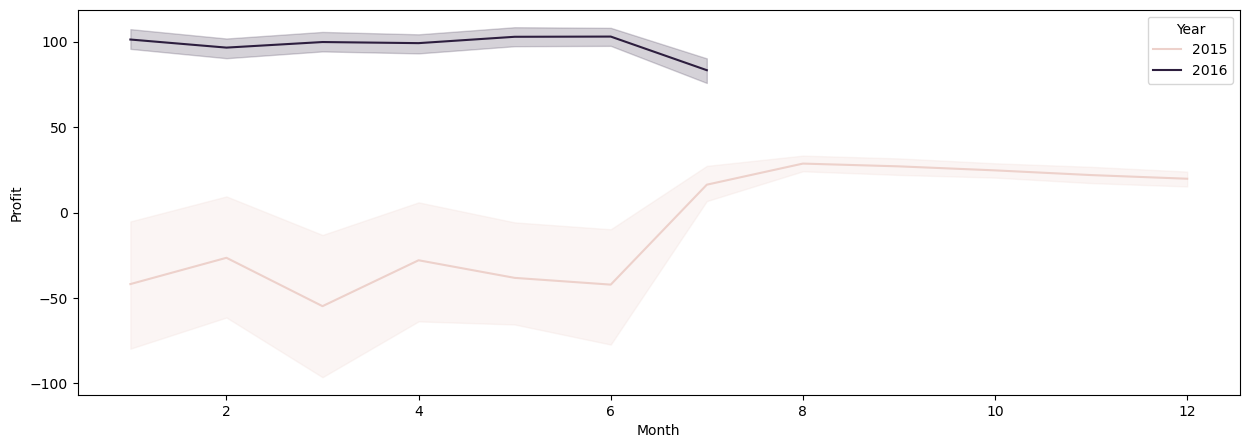

In [37]:
# Sales trend
plt.figure(figsize=(15,5))
sns.lineplot(x="Month", y="Profit", data=df, hue="Year");

# There was consistent loss in 2015 through till midyear while in 2016 a reduction in profit was noted still around mid year.

In [39]:
# Using Pivot table _ a table view of the figures
df.pivot_table(index="Year", columns="Month", values="Profit", aggfunc="sum")

Month,1,2,3,4,5,6,7,8,9,10,11,12
Year,,,,,,,,,,,,
2015,-5778.70,-4079.65,-8163.79,-4945.69,-7801.45,-8690.61,15104.47,65926.24,62172.33,62950.66,54480.9,67448.12
2016,280204.25,263640.18,299777.67,307746.51,356915.59,357549.86,107151.79,NaN,NaN,NaN,NaN,NaN


age_group,0-25 Young Adults,26-40 Adults,41-50 Older Adults,Above 50 Elders
Customer_Gender,,,,
F,58.305132,59.570505,69.016161,63.839299
M,61.412556,70.120867,69.650373,64.634706


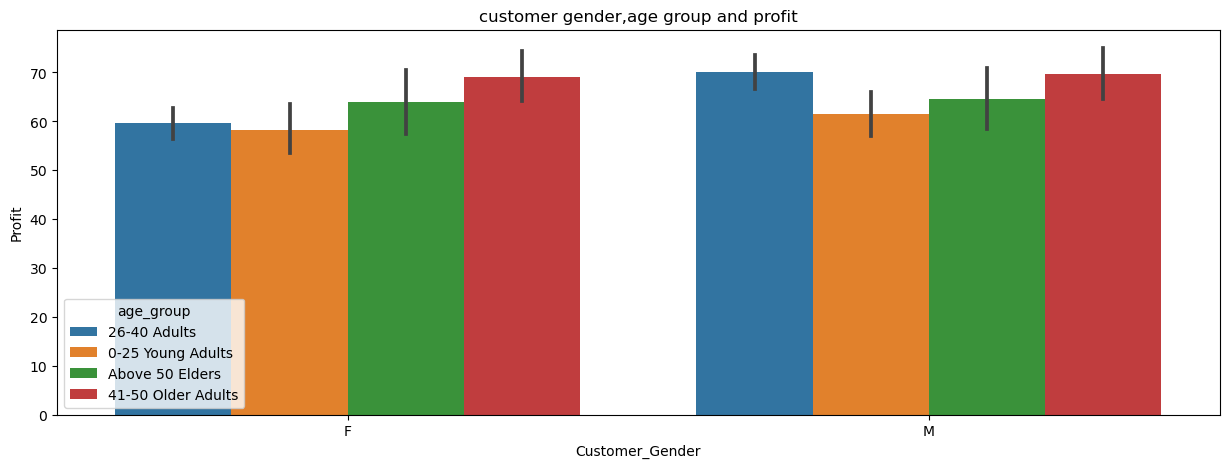

In [43]:
# Analysing customer gender,age group and profit 
plt.figure(figsize=(15,5))
sns.barplot(data=df, x="Customer_Gender", y="Profit", hue="age_group").set_title("customer gender,age group and profit");

# Visualizing the figures using pivot tables:
df.pivot_table(index="Customer_Gender", columns="age_group", values="Profit")

# The male genger in age group 26-40 have the highest sales

In [53]:
df.describe()

,Date,Customer_Age,Quantity,Unit_Cost,Unit_Price,Year,Month,Quarter,Cost,Revenue,Profit
count,34866,34866.000000,34866.000000,34866.000000,34866.000000,34866.000000,34866.000000,34866.000000,34866.000000,34866.000000,34866.000000
mean,2016-01-19 18:35:05.110996224,36.382636,2.002524,349.880567,389.232473,2015.569237,6.317845,2.424052,576.004303,640.870037,64.865734
min,2015-01-01 00:00:00,17.000000,1.000000,0.670000,0.670000,2015.000000,1.000000,1.000000,2.000000,2.000000,-937.000000
25%,2015-10-26 00:00:00,28.000000,1.000000,45.000000,53.670000,2015.000000,3.000000,1.000000,85.000000,102.000000,5.010000
50%,2016-01-28 00:00:00,35.000000,2.000000,150.000000,179.000000,2016.000000,6.000000,2.000000,261.000000,318.990000,27.000000
75%,2016-04-26 00:00:00,44.000000,3.000000,455.000000,521.000000,2016.000000,9.000000,3.000000,769.000000,902.010000,96.000000
max,2016-07-31 00:00:00,87.000000,3.000000,3240.000000,5082.000000,2016.000000,12.000000,4.000000,3600.000000,5082.000000,1842.000000
std,NaN,11.112969,0.813936,490.015846,525.319097,0.495190,3.465317,1.114747,690.500055,736.650609,152.879946


In [56]:
# Extracted all numerical columns from df
a = df.select_dtypes(include=['number'])
a

,Customer_Age,Quantity,Unit_Cost,Unit_Price,Year,Month,Quarter,Cost,Revenue,Profit
0,29,1.0,80.00,109.00,2016,2,1,80.00,109.00,29.00
1,29,2.0,24.50,28.50,2016,2,1,49.00,57.00,8.00
2,29,3.0,3.67,5.00,2016,2,1,11.01,15.00,3.99
3,29,2.0,87.50,116.50,2016,3,1,175.00,233.00,58.00
4,29,3.0,35.00,41.67,2016,3,1,105.00,125.01,20.01
...,...,...,...,...,...,...,...,...,...,...
34861,37,1.0,2049.00,1487.00,2015,3,1,2049.00,1487.00,-562.00
34862,38,2.0,1160.00,985.50,2016,2,1,2320.00,1971.00,-349.00
34863,38,1.0,2049.00,1583.00,2015,3,1,2049.00,1583.00,-466.00
34864,38,3.0,683.00,560.67,2015,4,2,2049.00,1682.01,-366.99


In [58]:
a.head(2)

,Customer_Age,Quantity,Unit_Cost,Unit_Price,Year,Month,Quarter,Cost,Revenue,Profit
0,29,1.0,80.0,109.0,2016,2,1,80.0,109.0,29.0
1,29,2.0,24.5,28.5,2016,2,1,49.0,57.0,8.0


In [60]:
# Correlation
b = a.corr()
b

,Customer_Age,Quantity,Unit_Cost,Unit_Price,Year,Month,Quarter,Cost,Revenue,Profit
Customer_Age,1.000000,0.002801,0.025360,0.026300,0.052688,-0.051610,-0.051932,0.026537,0.027762,0.013914
Quantity,0.002801,1.000000,-0.312514,-0.324109,0.000919,-0.000925,-0.000358,0.008295,0.008418,0.003097
Unit_Cost,0.025360,-0.312514,1.000000,0.981033,-0.073245,-0.018384,-0.024225,0.854908,0.836957,0.171576
Unit_Price,0.026300,-0.324109,0.981033,1.000000,-0.022628,-0.051448,-0.057183,0.832969,0.851034,0.338499
Year,0.052688,0.000919,-0.073245,-0.022628,1.000000,-0.810662,-0.812493,-0.084566,-0.025361,0.259750
Month,-0.051610,-0.000925,-0.018384,-0.051448,-0.810662,1.000000,0.971628,-0.019345,-0.058461,-0.194321
Quarter,-0.051932,-0.000358,-0.024225,-0.057183,-0.812493,0.971628,1.000000,-0.026190,-0.065223,-0.195989
Cost,0.026537,0.008295,0.854908,0.832969,-0.084566,-0.019345,-0.026190,1.000000,0.979119,0.201260
Revenue,0.027762,0.008418,0.836957,0.851034,-0.025361,-0.058461,-0.065223,0.979119,1.000000,0.396185
Profit,0.013914,0.003097,0.171576,0.338499,0.259750,-0.194321,-0.195989,0.201260,0.396185,1.000000


<Axes: >

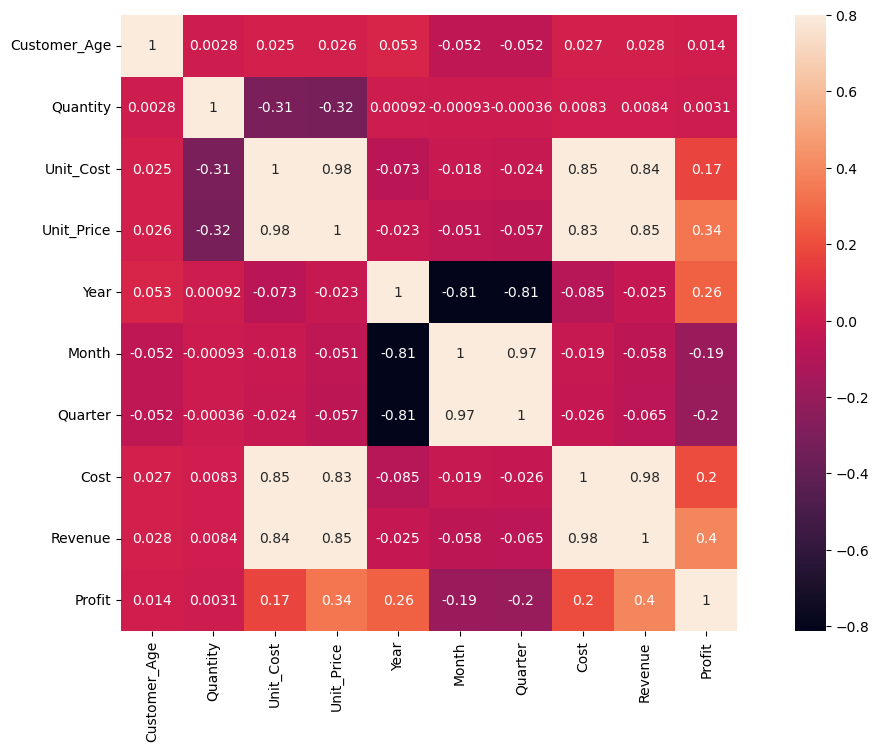

In [63]:
plt.figure(figsize=(15,8))
sns.heatmap(b, vmax=0.8, square =True, annot=True)

# Correlation is between -1 and 0 and +1.
# when its 0 or very close to zero, it means there is no correlation, -1 indicates a negative correlation

C:\Users\Godgive Computer\anaconda3\Lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\Godgive Computer\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


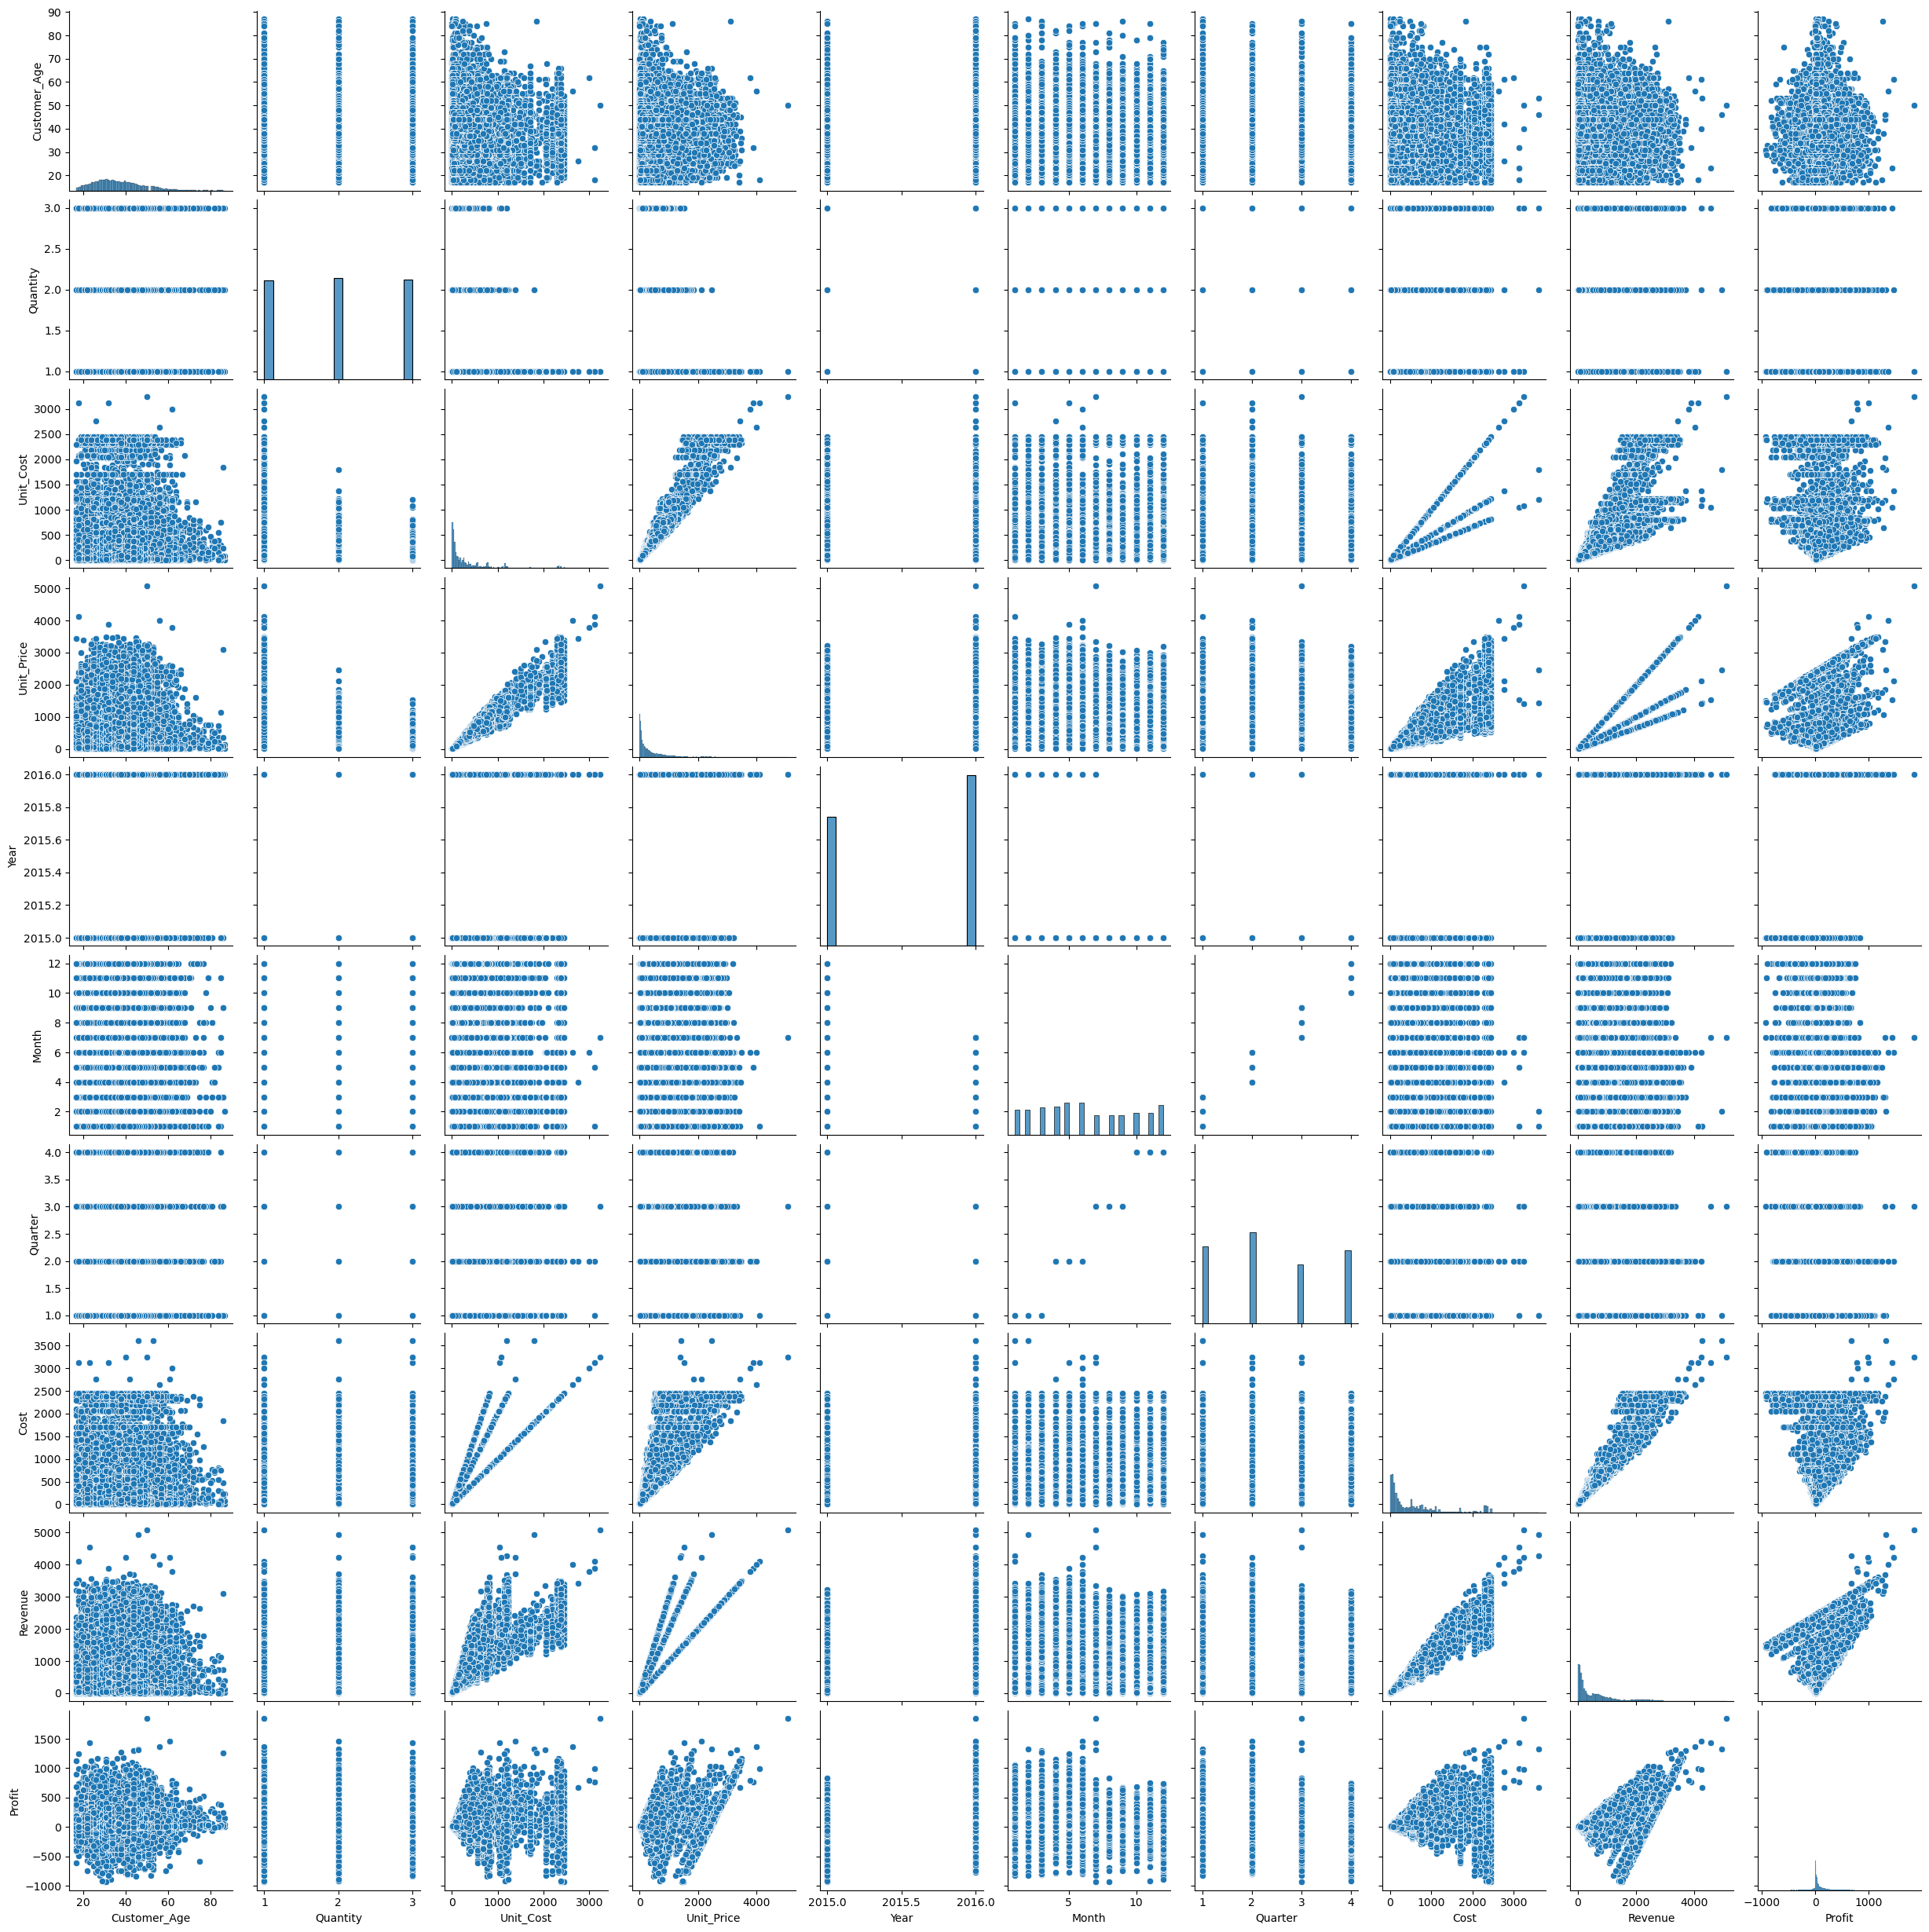

In [64]:
# Using pairplot to visualize features
sns.pairplot(df, size=2.5);